In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
dir_path = os.path.join("datasets", "ronec")

tokens = []
entity_tags = []

with open(os.path.join(dir_path, "train.json"), encoding="utf-8") as f:
    data = json.load(f)

    for element in data:
        tokens.append(element["tokens"])
        entity_tags.append(element["ner_tags"])

df = pd.DataFrame({
    "tokens": tokens,
    "entity_tags": entity_tags
})
df.head()

,tokens,entity_tags
0,"[-, Iohannis, ,, Klaus, Vacanță, Iohannis, -, ...","[O, B-PERSON, I-PERSON, I-PERSON, O, B-PERSON,..."
1,"[Vechiul, oraș, Visoki, a, fost, un, faimos, c...","[O, O, B-GPE, O, O, O, O, O, O, O, O, O, B-DAT..."
2,"[Comisia, națională, pentru, informatică, și, ...","[B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-O..."
3,"[Editura, Cartea, Românească, îi, invită, pe, ...","[B-ORG, I-ORG, I-ORG, O, O, O, O, B-PERSON, O,..."
4,"[Între, 1996-2000, ,, în, mandatul, Emil, Cons...","[B-PERIOD, I-PERIOD, O, O, O, B-PERSON, I-PERS..."


In [3]:
print(f"Number of sentences: {df.shape[0]}")

Number of sentences: 9000


count    9000.000000
mean       45.072111
std        29.136234
min         4.000000
25%        28.000000
50%        39.000000
75%        54.000000
max       561.000000
Name: tokens, dtype: float64


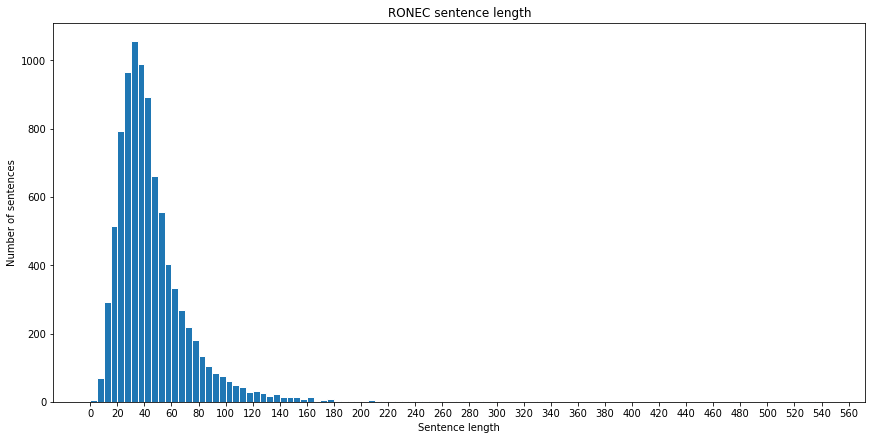

In [4]:
sentence_length = df["tokens"].apply(lambda sentence: len(sentence))
print(sentence_length.describe())

fig, ax = plt.subplots(figsize=(12, 6), layout="constrained")
ax.hist(sentence_length, bins=np.arange(0, 550, 5), edgecolor="white")
ax.set_xlabel("Sentence length")
ax.set_ylabel("Number of sentences")
ax.set_title("RONEC sentence length")
ax.set_xticks(np.arange(0, 580, 20))
plt.show()

In [5]:
print(f"Mean sentence length: {sentence_length.mean():.2f}")

Mean sentence length: 45.07


In [6]:
unique_entities = df["entity_tags"].explode().unique()
print("Unique entity tags:")
for tag in sorted(unique_entities):
    print(f"  -> {tag}")

Unique entity tags:
  -> B-DATETIME
  -> B-EVENT
  -> B-FACILITY
  -> B-GPE
  -> B-LANGUAGE
  -> B-LOC
  -> B-MONEY
  -> B-NAT_REL_POL
  -> B-NUMERIC
  -> B-ORDINAL
  -> B-ORG
  -> B-PERIOD
  -> B-PERSON
  -> B-QUANTITY
  -> B-WORK_OF_ART
  -> I-DATETIME
  -> I-EVENT
  -> I-FACILITY
  -> I-GPE
  -> I-LANGUAGE
  -> I-LOC
  -> I-MONEY
  -> I-NAT_REL_POL
  -> I-NUMERIC
  -> I-ORDINAL
  -> I-ORG
  -> I-PERIOD
  -> I-PERSON
  -> I-QUANTITY
  -> I-WORK_OF_ART
  -> O


In [7]:
entity_tags = set(unique_entities)
entity_tags.difference_update("O")

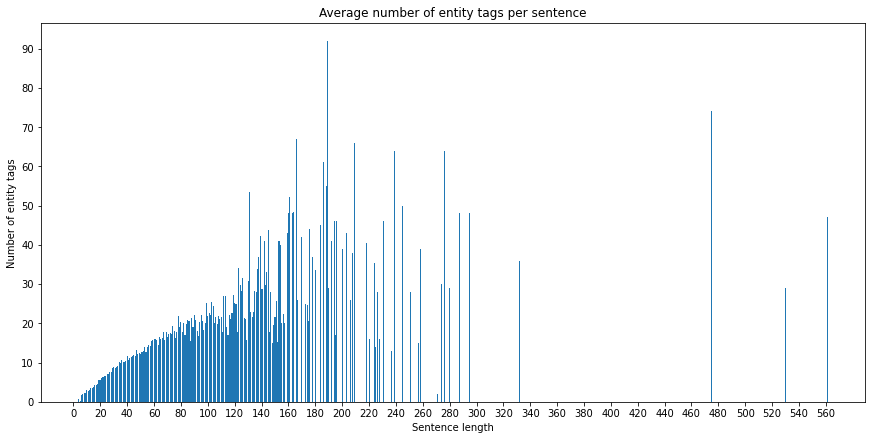

In [8]:
def count_entity_tags_per_sentence(sentence_entity_tags):
    def is_valid(entity_tag):
        return entity_tag in entity_tags
    
    valid_entity_tags = list(filter(is_valid, sentence_entity_tags))
    return len(valid_entity_tags)

num_entity_tags_per_sentence = df["entity_tags"].map(count_entity_tags_per_sentence)
avg_entity_tags_per_sentence_length = pd.DataFrame(
    {
        "sentence_length": sentence_length,
        "num_entity_tags": num_entity_tags_per_sentence
    }
).groupby("sentence_length").mean()

fig, ax = plt.subplots(figsize=(12, 6), layout="constrained")
ax.bar(
    avg_entity_tags_per_sentence_length.index,
    avg_entity_tags_per_sentence_length["num_entity_tags"]
)
ax.set_xticks(np.arange(0, 580, 20))
ax.set_yticks(np.arange(0, 100, 10))
ax.set_xlabel("Sentence length")
ax.set_ylabel("Number of entity tags")
ax.set_title("Average number of entity tags per sentence")
plt.show()

In [9]:
flatten_entity_tags = df["entity_tags"].explode()
valid_entity_tags = flatten_entity_tags[flatten_entity_tags.isin(entity_tags)]
count_entity_tags = valid_entity_tags.value_counts()
print(count_entity_tags)

B-PERSON         19167
I-PERSON          9476
I-ORG             8903
I-DATETIME        8542
B-GPE             8193
B-DATETIME        6960
B-NUMERIC         5734
B-ORG             5688
I-WORK_OF_ART     4033
B-NAT_REL_POL     3673
I-LOC             2176
I-MONEY           1977
I-EVENT           1859
I-PERIOD          1842
B-LOC             1824
I-FACILITY        1713
B-ORDINAL         1377
I-GPE             1243
B-QUANTITY        1161
B-WORK_OF_ART     1157
B-MONEY           1041
I-ORDINAL          877
B-PERIOD           862
B-FACILITY         840
B-EVENT            826
I-QUANTITY         790
B-LANGUAGE         342
I-NUMERIC          214
I-LANGUAGE         147
I-NAT_REL_POL       60
Name: entity_tags, dtype: int64


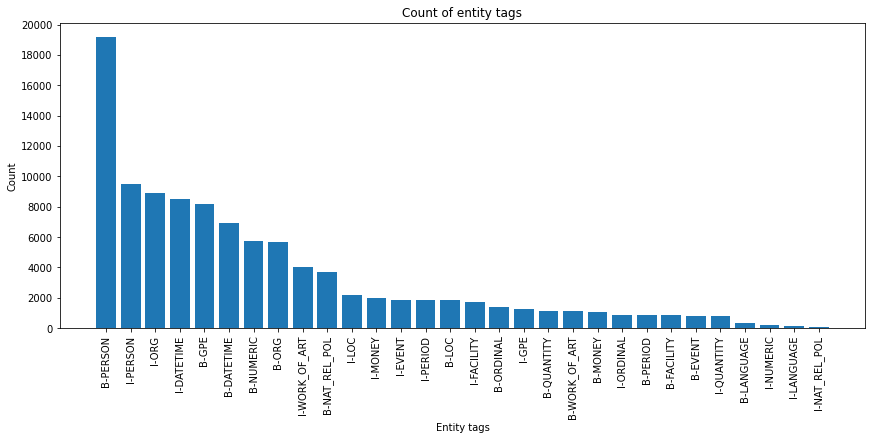

In [10]:
fig, ax = plt.subplots(figsize=(12, 6), layout="constrained")
xticks = np.arange(len(count_entity_tags))
ax.bar(
    xticks,
    count_entity_tags
)
ax.set_xticks(xticks, count_entity_tags.index, rotation=90)
ax.set_yticks(np.arange(0, 22_000, 2000))
ax.set_xlabel("Entity tags")
ax.set_ylabel("Count")
ax.set_title("Count of entity tags")
plt.show()